In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
%cd /content/gdrive/MyDrive/CSE-498/Adversarial_Learning
!ls
!nvidia-smi

/content/gdrive/MyDrive/CSE-498/Adversarial_Learning
adversarial_learning_main.py  datasets		      __pycache__
attacking_main.py	      experiment_operator.py  README.md
attacking_teset.py	      learning_main.py	      run_code.ipynb
base_model.py		      Middle_Results
data_process.py		      model_weights
Tue Mar 23 15:14:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27

In [21]:
!python attacking_teset.py 1 0 -l 1e4 -n 1 -b 1 -p

Loading mnist to the memory...
Initialize ResNet18...
Loading learned parameters...
Print model's performance: training_accuracy = 0.9931, testing_accuracy = 0.9885
                           training_loss = 0.021708, testing_loss = 0.033731
0.1362
0.1368
Traceback (most recent call last):
  File "attacking_teset.py", line 116, in <module>
    print_info=False)
  File "/content/gdrive/My Drive/CSE-498/Adversarial_Learning/experiment_operator.py", line 225, in sample_attack_train
    print(epoch + 1, loss.item())
  File "/usr/local/lib/python3.7/dist-packages/torch/tensor.py", line 245, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph, inputs=inputs)
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py", line 147, in backward
    allow_unreachable=True, accumulate_grad=True)  # allow_unreachable flag
KeyboardInterrupt


Loading cifar10 to the memory...
Initialize ResNet18...
The chosen picture's idx and class are as below:
6
frog
Visualize this picture:


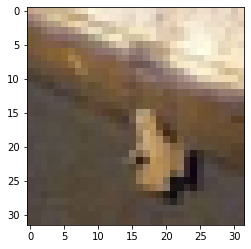

Loading learned parameters...
Print model's performance: training_accuracy = 0.9983, testing_accuracy = 0.9058
                           training_loss = 0.000065, testing_loss = 0.006006
Prediction before attack:
True class probability: 0.7195222184939873
Predictive class: 6
Start attacking...
!
Learning the perturbation delta...
5 -20.685518264770508
10 -31.782466888427734
15 -23.89246368408203
20 -35.08518600463867
25 -37.239013671875
30 -30.464908599853516
35 -35.03525161743164


40 -16.76421356201172
45 -30.438793182373047
50 -17.08310317993164
After perturbation:
True class probability: 3.8098018961818525e-08
Predictive class: 2
Highest class probability: 0.9999996423721313
Visualization of delta:


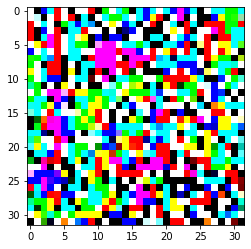

Visualization of sample+delta:


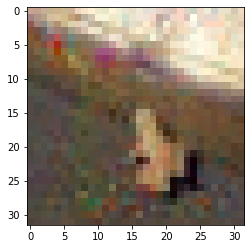

[ 1.9696832e-01  2.5851881e-02  2.6265407e-01  4.0257475e-01
  5.3283787e-01  2.2406561e-02 -2.8128725e-01 -7.8348555e-03
 -4.0203445e-02  1.8523486e-01 -1.2948191e-01 -6.5792494e-02
  2.3503065e-02 -5.6953814e-02 -8.9839110e-03 -5.9397451e-05
 -9.2363134e-02 -2.1494983e-01 -1.3011411e-01 -7.4130163e-02
 -4.4698012e-03 -1.3965295e-01 -1.3798140e-01  9.0645298e-02
  6.2095404e-02 -9.2234656e-02  2.3308778e-02 -5.2410752e-02
 -1.5856670e-01 -6.1408743e-02  8.9289151e-02 -2.1349305e-02]


In [ ]:
# 30 226 426 912 1034
# model dataset --lr --norm --batch_size --sample --pgd(action="store_true") --target 
%run attacking_main.py 1 1 -l 10000000 -n 1 -b 100 -s 1000 -p

In [5]:
!python learning_main.py --help

usage: learning_main.py [-h] [-l LR] [-n NORM] [-b BATCH_SIZE] [-i ITERATIONS]
                        [-s SCHEDULE_INTERVALS [SCHEDULE_INTERVALS ...]]
                        {0,1} {0,1}

This is the main training program.
Firstly, You can specify the dataset and network for the learning process.
Secondly, You can also set hyper-parameters for your model training.
More details can be seen from the introduction of arguments below .

positional arguments:
  {0,1}                 specify a deep learning model (1 as default)
                        0: LeNet (a CNN with two conv layers)
                        1: ResNet18 (change the first conv layer a little bit)
  {0,1}                 specify a dataset to learn (1 as default)
                        0: mnist
                        1: cifar10

optional arguments:
  -h, --help            show this help message and exit
  -l LR, --lr LR        give an initial learning rate to our model
  -n NORM, --norm NORM  choose the norm for normaliza

In [ ]:
# model dataset --lr --norm --batch_size --iterations --schedule_intervals
!python learning_main.py 1 1 -l 0.1 -n 1 -b 100 -i 400 -s 135 230 300

In [ ]:
!python adversarial_learning_main.py 1 0 -l 0.01 -n 1 -b 100 -i 10 -s 50 70 90

Namespace(batch_size=100, dataset=0, iterations=100, lr=0.01, model=1, norm=1, schedule_intervals=[50, 70, 90])
Loading mnist to the memory...
Initializing ResNet18...
Start training...
Standard Learning...
Learning Rate = 0.01000000
Epoch 001: training_accuracy = 0.9574, testing_accuracy = 0.9664
           training_loss = 0.001321, testing_loss = 0.001084
Finished Training after 001 iterations
Adversarial Learning...
Learning Rate = 0.01000000
Epoch 001: training_accuracy = 0.1124, testing_accuracy = 0.1135
           training_loss = 0.023013, testing_loss = 0.023011
Standard Learning...
Learning Rate = 0.01000000
Epoch 001: training_accuracy = 0.9243, testing_accuracy = 0.9242
           training_loss = 0.002373, testing_loss = 0.002453
Finished Training after 001 iterations
Adversarial Learning...
Learning Rate = 0.01000000
Epoch 002: training_accuracy = 0.1124, testing_accuracy = 0.1135
           training_loss = 0.023013, testing_loss = 0.023010
Standard Learning...
Learning Rate